In [1]:
# ✅ Instalar dependencias necesarias (si no usas conda)
!pip install -q pandas numpy scikit-learn matplotlib seaborn optuna


In [4]:
# ✅ Ajustar path para importar desde src/
import sys
from pathlib import Path

# ✅ Ir un solo nivel hacia arriba (de notebook/ a la raíz del proyecto)
project_root = Path().resolve().parent
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))


In [5]:
# ✅ Importar funciones del pipeline
from src.utils import cargar_dataset, preprocesar_datos, entrenar_modelo_base
from src.optimizacion import (
    optimizar_con_gridsearch,
    optimizar_con_randomsearch,
    optimizar_con_optuna,
)
from src.visualizador import (
    visualizar_matriz_confusion,
    visualizar_curva_roc,
    graficar_metricas_comparativas,
)


/home/mparraf/.local/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
# 🚀 Iniciar pipeline
df = cargar_dataset()
X_train, X_test, y_train, y_test = preprocesar_datos(df)



✨ Primeras filas del dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

ℹ️ Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               76


🌲 Entrenando modelo base...

📊 Evaluación del modelo base:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       100
           1       0.68      0.59      0.63        54

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.76      0.76       154

F1-Score: 0.6337
Precision: 0.6809
Recall: 0.5926
AUC: 0.8145
Tiempo de entrenamiento: 0.11 segundos


<Figure size 600x500 with 0 Axes>

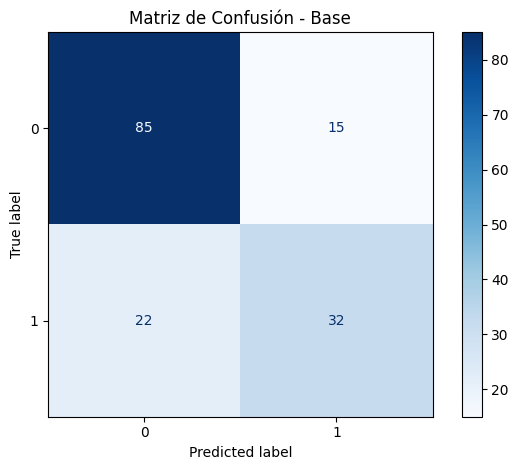

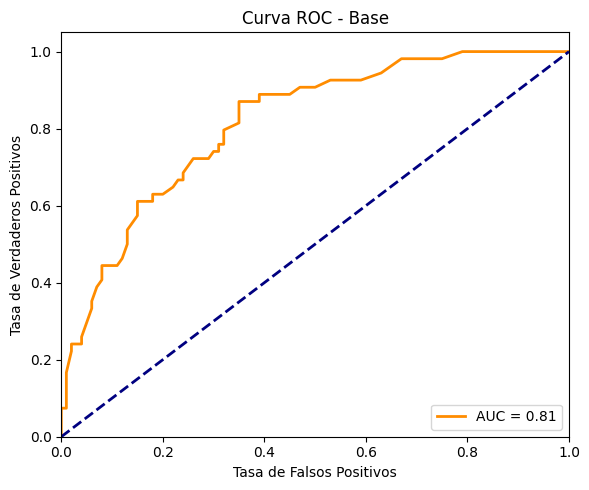

In [7]:
# 🌲 Modelo base
resultados = []
resultado_base = entrenar_modelo_base(X_train, y_train, X_test, y_test)
resultados.append({
    "metodo": "Base",
    "f1": resultado_base["f1"],
    "precision": resultado_base["precision"],
    "recall": resultado_base["recall"],
    "auc": resultado_base["auc"]
})
visualizar_matriz_confusion(y_test, resultado_base["y_pred"], metodo="Base")
visualizar_curva_roc(y_test, resultado_base["y_prob"], metodo="Base")



🔧 Grid Search en progreso...
✅ Mejores parámetros Grid Search: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}

📊 Evaluación GridSearch:
F1-Score: 0.6346
Precision: 0.6600
Recall: 0.6111
AUC: 0.8172
⏱️ Tiempo de optimización: 5.26 segundos


<Figure size 600x500 with 0 Axes>

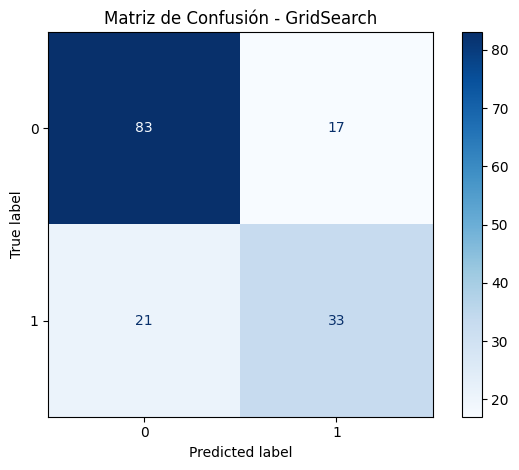

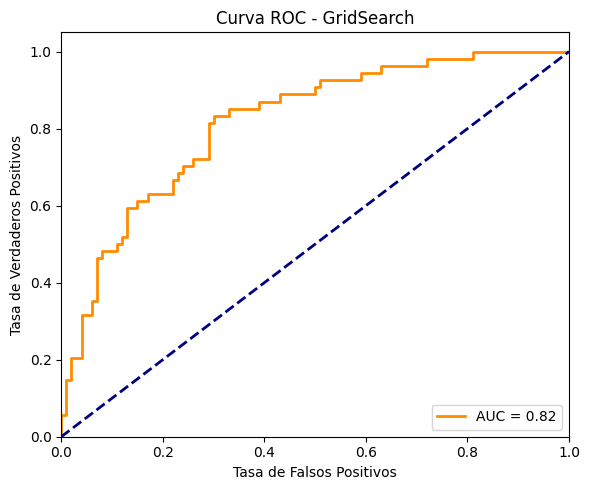

In [8]:
# 🔍 GridSearch
resultado_grid = optimizar_con_gridsearch(X_train, y_train, X_test, y_test)
resultados.append({
    "metodo": "GridSearch",
    "f1": resultado_grid["f1"],
    "precision": resultado_grid["precision"],
    "recall": resultado_grid["recall"],
    "auc": resultado_grid["auc"]
})
visualizar_matriz_confusion(y_test, resultado_grid["y_pred"], metodo="GridSearch")
visualizar_curva_roc(y_test, resultado_grid["y_prob"], metodo="GridSearch")



🍀 Random Search en progreso...


/home/mparraf/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 48 is smaller than n_iter=500. Running 48 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


✅ Mejores parámetros Random Search: {'n_estimators': 200, 'min_samples_split': 10, 'max_depth': 10}

📊 Evaluación RandomSearch:
F1-Score: 0.6346
Precision: 0.6600
Recall: 0.6111
AUC: 0.8172
⏱️ Tiempo de optimización: 3.49 segundos


<Figure size 600x500 with 0 Axes>

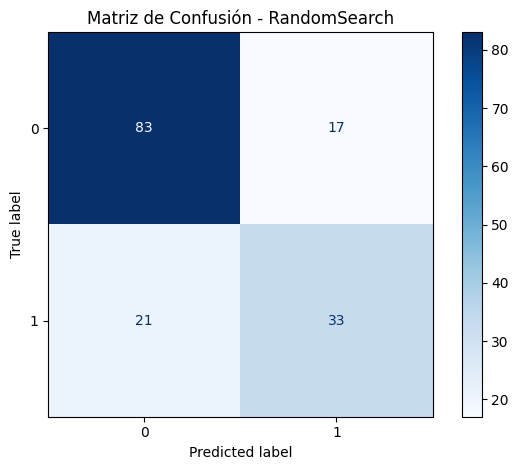

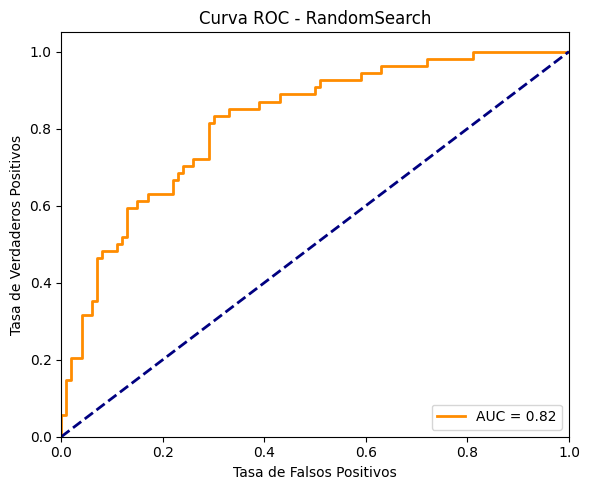

In [9]:
# 🎲 RandomSearch
resultado_random = optimizar_con_randomsearch(X_train, y_train, X_test, y_test)
resultados.append({
    "metodo": "RandomSearch",
    "f1": resultado_random["f1"],
    "precision": resultado_random["precision"],
    "recall": resultado_random["recall"],
    "auc": resultado_random["auc"]
})
visualizar_matriz_confusion(y_test, resultado_random["y_pred"], metodo="RandomSearch")
visualizar_curva_roc(y_test, resultado_random["y_prob"], metodo="RandomSearch")


[I 2025-07-06 19:25:18,024] A new study created in memory with name: no-name-8c08e380-f834-4062-8923-692bc56ca231



🔮 Optimizando con Optuna...


[I 2025-07-06 19:25:18,258] Trial 0 finished with value: 0.5714285714285714 and parameters: {'n_estimators': 200, 'max_depth': 5, 'min_samples_split': 10}. Best is trial 0 with value: 0.5714285714285714.
[I 2025-07-06 19:25:18,314] Trial 1 finished with value: 0.574468085106383 and parameters: {'n_estimators': 50, 'max_depth': 5, 'min_samples_split': 2}. Best is trial 1 with value: 0.574468085106383.
[I 2025-07-06 19:25:18,450] Trial 2 finished with value: 0.6285714285714287 and parameters: {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 2}. Best is trial 2 with value: 0.6285714285714287.
[I 2025-07-06 19:25:18,581] Trial 3 finished with value: 0.62 and parameters: {'n_estimators': 100, 'max_depth': None, 'min_samples_split': 10}. Best is trial 2 with value: 0.6285714285714287.
[I 2025-07-06 19:25:18,819] Trial 4 finished with value: 0.6346153846153846 and parameters: {'n_estimators': 200, 'max_depth': 20, 'min_samples_split': 2}. Best is trial 4 with value: 0.6346153846153

✅ Mejores parámetros Optuna: {'n_estimators': 200, 'max_depth': 10, 'min_samples_split': 2}

📊 Evaluación Optuna:
F1-Score: 0.6476
Precision: 0.6667
Recall: 0.6296
AUC: 0.8154
⏱️ Tiempo de optimización: 135.01 segundos


<Figure size 600x500 with 0 Axes>

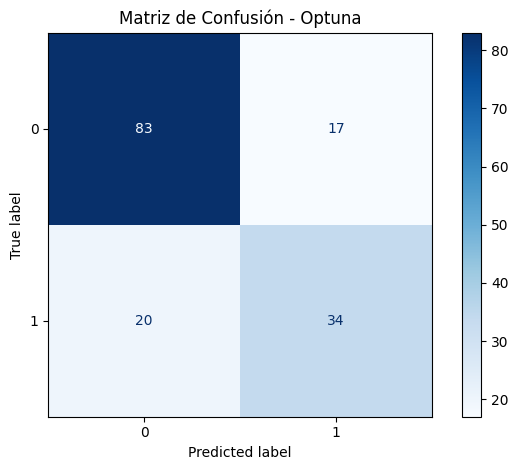

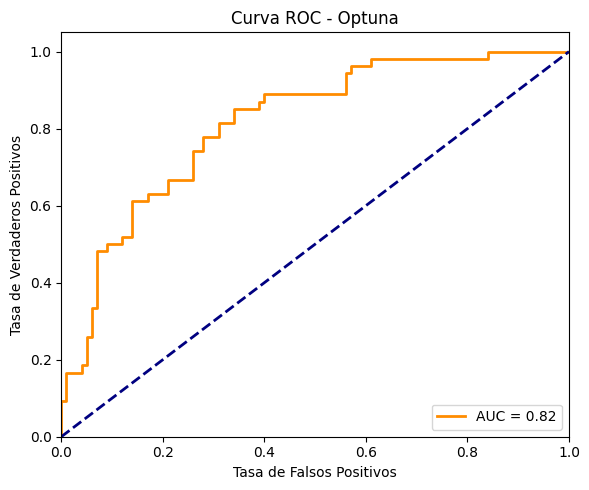

In [10]:
# 🔮 Optuna
resultado_optuna = optimizar_con_optuna(X_train, y_train, X_test, y_test)
resultados.append({
    "metodo": "Optuna",
    "f1": resultado_optuna["f1"],
    "precision": resultado_optuna["precision"],
    "recall": resultado_optuna["recall"],
    "auc": resultado_optuna["auc"]
})
visualizar_matriz_confusion(y_test, resultado_optuna["y_pred"], metodo="Optuna")
visualizar_curva_roc(y_test, resultado_optuna["y_prob"], metodo="Optuna")


/home/mparraf/myprojects/ESpecialidadMachineLearning/Modulo4Clase1MarcoParra/src/visualizador.py:81: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
/home/mparraf/myprojects/ESpecialidadMachineLearning/Modulo4Clase1MarcoParra/src/visualizador.py:84: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.savefig("outputs/comparacion_metricas_modelos.png")
/home/mparraf/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


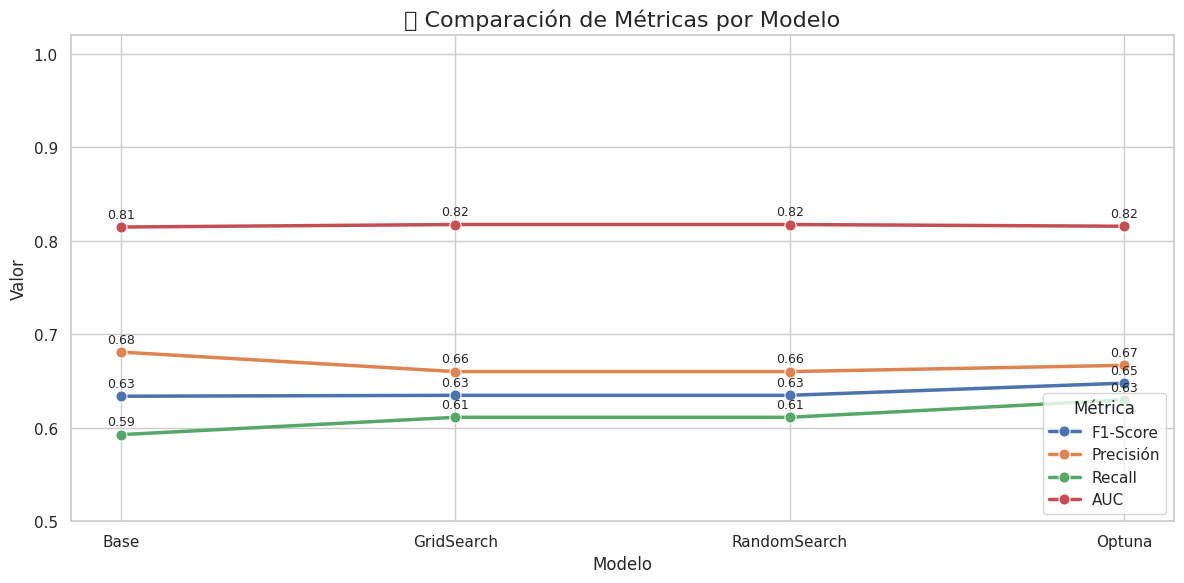

In [11]:
# 📊 Comparación de todos los modelos
graficar_metricas_comparativas(resultados)
